# Feature Extraction

딥러닝이 나오기 전에는 이미지를 서로 구분할 수 있는 핵심적 특징을 수치로 표현하고 이 수치를 분포 차이를 이용하여 이미지를 인식하는 방법을 사용했다. 이 방법은 훌륭하지만, Feature를 만들어 내는 것이 고통스러운 작업이다.

<img src="https://i.imgur.com/Yzq3JFD.jpg" width="100%">

(1, 3, 3, 1)


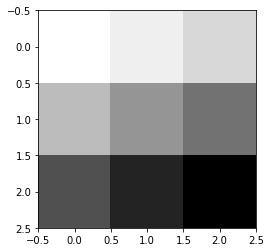

In [0]:
# cnnToyImage.ipynb

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
image=np.array([[[[1],[2],[3]],
                 [[4],[5],[6]],
                 [[7],[8],[9]]]], dtype=np.float32)

print (image.shape)
plt.grid(False)
plt.imshow(image.reshape(3,3), cmap='Greys')
plt.show()

In [0]:
weight=tf.constant([[[[1.]],[[1.]]],
                    [[[1.]],[[1.]]]])
print ("weight.shape", weight.shape)
conv2d=tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID')
conv2d_img=conv2d.numpy()
print ("conv2d_img.shape",conv2d_img.shape )
print(conv2d_img)

weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[[[12.]
   [16.]]

  [[24.]
   [28.]]]]


In [0]:
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
conv2d = tf.nn.relu(conv2d)
conv2d_img=conv2d.numpy()
print ("conv2d_img.shape",conv2d_img.shape)
print(conv2d_img)

conv2d_img.shape (1, 3, 3, 1)
[[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]]


In [0]:
image=np.array([[[[1,1,1],[2,2,2],[3,3,3]],
                 [[4,4,4],[5,5,5],[6,6,6]],
                 [[7,7,7],[8,8,8],[9,9,9]]]], dtype=np.float32)
print (image.shape)
weight=tf.constant([[[[1.],[1.],[1.]],[[1.],[1.],[1.]]],
                    [[[1.],[1.],[1.]],[[1.],[1.],[1.]]]])
print ("weight.shape", weight.shape)

conv2d=tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID')
conv2d_img=conv2d.numpy()
print ("conv2d_img.shape", conv2d_img.shape)
print(conv2d_img)

(1, 3, 3, 3)
weight.shape (2, 2, 3, 1)
conv2d_img.shape (1, 2, 2, 1)
[[[[36.]
   [48.]]

  [[72.]
   [84.]]]]


In [0]:
image=np.array([[[[1],[2],[3]],
                 [[4],[5],[6]],
                 [[7],[8],[9]]]], dtype=np.float32)

weight=tf.constant([[[[1.,10., -1.]],[[1.,10., -1.]]],
                    [[[1.,10., -1.]],[[1.,10., -1.]]]])
print ("weight.shape", weight.shape)
conv2d=tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
conv2d_img=conv2d.numpy()
print ("conv2d_img.shape",conv2d_img.shape)
print(conv2d_img)

weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[[[ 12. 120. -12.]
   [ 16. 160. -16.]
   [  9.  90.  -9.]]

  [[ 24. 240. -24.]
   [ 28. 280. -28.]
   [ 15. 150. -15.]]

  [[ 15. 150. -15.]
   [ 17. 170. -17.]
   [  9.  90.  -9.]]]]


[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


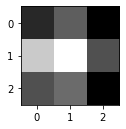

[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]


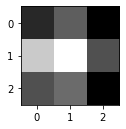

[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


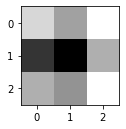

In [0]:
# plotting Code
conv2d_img=np.swapaxes(conv2d_img, 0,3)
for i, one_img in enumerate(conv2d_img):
    print (one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.grid(False), plt.imshow(one_img.reshape(3,3), cmap='gray')
    plt.show()

11493376/11490434 [==============================] - 0s 0us/step


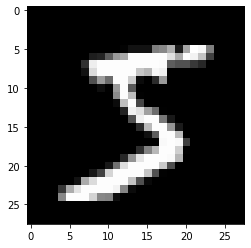

In [0]:
# Mnist_convLayer.ipynb

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
mnist = datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

img=train_x[0]
plt.imshow(img, cmap='gray')
plt.show()

In [0]:
img=img.reshape(-1,28,28,1)
W1=tf.random.normal([3,3,1,5], stddev=0.01)
W1

<tf.Tensor: shape=(3, 3, 1, 5), dtype=float32, numpy=
array([[[[ 0.0184574 , -0.01170227,  0.00828892, -0.01142316,
           0.00205196]],

        [[-0.0060019 , -0.00150527,  0.00422387,  0.00921819,
           0.0038018 ]],

        [[-0.04055589, -0.00293045,  0.0019571 ,  0.0254155 ,
           0.00314312]]],


       [[[-0.01401243, -0.00277041,  0.01457643, -0.00421239,
          -0.01014566]],

        [[ 0.02243598,  0.0225643 , -0.00235105,  0.00738867,
          -0.00871697]],

        [[ 0.00612691, -0.00629935,  0.00136519,  0.01544933,
          -0.00366551]]],


       [[[ 0.00063295, -0.00122113,  0.00763885, -0.00881646,
           0.00395189]],

        [[ 0.00226791,  0.00230267, -0.01173156, -0.01526328,
          -0.00885781]],

        [[-0.00649816, -0.00420148,  0.00868593, -0.00731919,
          -0.01122164]]]], dtype=float32)>

conv2d_img (1, 14, 14, 5)


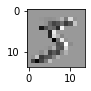

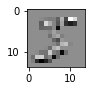

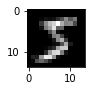

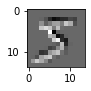

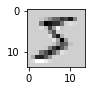

In [0]:
conv2d=tf.nn.conv2d(img, W1, strides=[1,2,2,1], padding='SAME')
conv2d_img=conv2d.numpy()
print('conv2d_img',conv2d_img.shape)
conv2d_img=np.swapaxes(conv2d_img,0,3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray'), plt.show()

pool_img (1, 7, 7, 5)


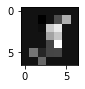

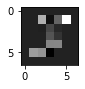

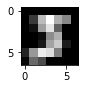

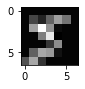

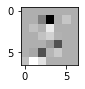

In [0]:
pool=tf.nn.max_pool(conv2d, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
pool_img=pool.numpy()
print('pool_img',pool_img.shape)
pool_img=np.swapaxes(pool_img,0,3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7,7), cmap='gray'), plt.show()

In [0]:
# Mnist_CNN_TF2.ipynb

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets 
from tensorflow.keras.utils import to_categorical

In [0]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0
train_y_onehot = to_categorical(train_labels)
test_y_onehot = to_categorical(test_labels)
train_y_onehot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
model = models.Sequential()
# (B, 28, 28, 1)
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)))    # w: 1*3*3*32+32=320
# (B, 26, 26, 32)
model.add(layers.MaxPooling2D((2, 2)))
# (B, 13, 13, 32)
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # w: 32*3*3*64+64=18496
# (B, 11, 11, 64)
model.add(layers.MaxPooling2D((2, 2)))
# (B, 5, 5, 64)
model.add(layers.Flatten())
# (B, 1600)
model.add(layers.Dense(10, activation='softmax'))       # w: 1600*10+10=16010
# (B, 10)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
____________________________________________________

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_y_onehot, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1591 - accuracy: 0.9524
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0534 - accuracy: 0.9838
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0393 - accuracy: 0.9882
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0310 - accuracy: 0.9904
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0232 - accuracy: 0.9925


In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_y_onehot, verbose=2)

313/313 - 1s - loss: 0.0273 - accuracy: 0.9917


In [0]:
print(test_acc)

0.9916999936103821


In [0]:
# Mnist_CNNDNN_TF2.ipynb

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets 
from tensorflow.keras.utils import to_categorical

In [0]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0
train_y_onehot = to_categorical(train_labels)
test_y_onehot = to_categorical(test_labels)
train_y_onehot[0]

11493376/11490434 [==============================] - 0s 0us/step


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
model = models.Sequential()
# (B, 28, 28, 1)
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
# (B, 28, 28, 32)
model.add(layers.MaxPooling2D((2, 2)))
# (B, 14, 14, 32)
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
# (B, 14, 14, 64)
model.add(layers.MaxPooling2D((2, 2)))
# (B, 7, 7, 64)
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
# (B, 7, 7, 64)
model.add(layers.MaxPooling2D((2, 2)))
# (B, 3, 3, 64)
model.add(layers.Flatten())
# (B, 576)
model.add(layers.Dense(128, activation='relu'))
# (B, 128)
model.add(layers.Dense(64, activation='relu'))
# (B, 64)
model.add(layers.Dense(10, activation='softmax'))
# (B, 10)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_y_onehot, batch_size = 100, epochs=5)

Epoch 1/5
600/600 [==============================] - 2s 4ms/step - loss: 0.2199 - accuracy: 0.9311
Epoch 2/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0584 - accuracy: 0.9819
Epoch 3/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0423 - accuracy: 0.9872
Epoch 4/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0303 - accuracy: 0.9905
Epoch 5/5
600/600 [==============================] - 3s 4ms/step - loss: 0.0267 - accuracy: 0.9918


In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_y_onehot, verbose=2)

313/313 - 1s - loss: 0.0321 - accuracy: 0.9902


In [0]:
print(test_acc)

0.9901999831199646


In [0]:
# FashionMnist.ipynb

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set


y = 2 Pullover


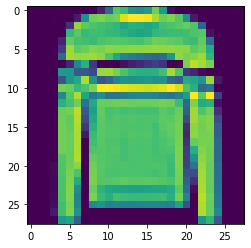

Number of train data - 60000
Number of test data - 10000


In [0]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2
                        "Dress",        # index 3
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6
                        "Sneaker",      # index 7
                        "Bag",          # index 8
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])
plt.show()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))


In [0]:
# 6만장 중, 1~55000장은 train, 55000~60000은 valid dataSet
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print(x_train.shape, x_valid.shape)
print(y_train.shape, y_valid.shape)

(55000, 28, 28) (5000, 28, 28)
(55000,) (5000,)


In [0]:
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')


x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


<center><img src="https://drive.google.com/uc?id=1eMJDywkwenvNfRUIPUEzsK-vomeNVIQ1" width="800" height="400"></center>

In [0]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
# (B, 28, 28, 1)
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
# (B, 28, 28, 64)
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# (B, 14, 14, 64)
model.add(tf.keras.layers.Dropout(0.3))
# (B, 14, 14, 64)
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
# (B, 14, 14, 64)
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# (B, 7, 7, 32)
model.add(tf.keras.layers.Dropout(0.3))
# (B, 7, 7, 32)
model.add(tf.keras.layers.Flatten())
# (B, 1568)
model.add(tf.keras.layers.Dense(256, activation='relu'))
# (B, 256)
model.add(tf.keras.layers.Dropout(0.5))
# (B, 256)
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# (B, 10)

# Take a look at the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)             

In [0]:
import time
s = time.time()

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid) ,verbose=2)


# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])
e = time.time()
print(e-s)

Epoch 1/10
860/860 - 4s - loss: 0.5958 - accuracy: 0.7831 - val_loss: 0.3806 - val_accuracy: 0.8650
Epoch 2/10
860/860 - 3s - loss: 0.4168 - accuracy: 0.8484 - val_loss: 0.3188 - val_accuracy: 0.8882
Epoch 3/10
860/860 - 4s - loss: 0.3776 - accuracy: 0.8625 - val_loss: 0.3148 - val_accuracy: 0.8870
Epoch 4/10
860/860 - 4s - loss: 0.3500 - accuracy: 0.8721 - val_loss: 0.2884 - val_accuracy: 0.8936
Epoch 5/10
860/860 - 4s - loss: 0.3267 - accuracy: 0.8815 - val_loss: 0.2656 - val_accuracy: 0.9076
Epoch 6/10
860/860 - 4s - loss: 0.3132 - accuracy: 0.8861 - val_loss: 0.2606 - val_accuracy: 0.9054
Epoch 7/10
860/860 - 4s - loss: 0.2973 - accuracy: 0.8901 - val_loss: 0.2481 - val_accuracy: 0.9050
Epoch 8/10
860/860 - 4s - loss: 0.2871 - accuracy: 0.8951 - val_loss: 0.2472 - val_accuracy: 0.9048
Epoch 9/10
860/860 - 4s - loss: 0.2798 - accuracy: 0.8981 - val_loss: 0.2329 - val_accuracy: 0.9126
Epoch 10/10
860/860 - 4s - loss: 0.2742 - accuracy: 0.8993 - val_loss: 0.2357 - val_accuracy: 0.9124

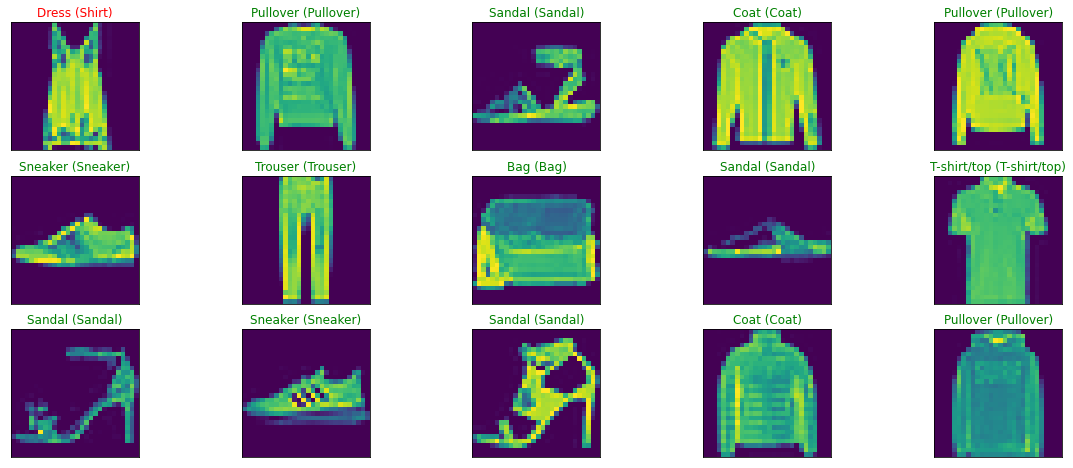

In [0]:
import numpy as np
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [0]:
# image2np.ipynb

import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import matplotlib.image as mpimg
import csv

def conv2np(fname):
    # 그림 한장을 flatten 해서 수치로 출력한다.
    # 32 * 32 * 3 = 3072개 숫자를 리턴한다.
   image=mpimg.imread(fname)
   return image.reshape(3072)


def csvWriter(folder, csvName):
    # 입력 폴더에서 이미지 리스트를 만들고 리스트에서 이미지를 하나씩 꺼내 (X, Y) 데이터를 생성
    # "cifar3Train.csv", "cifar3Test.csv" 로 저장
    images = os.listdir(folder)

    xData = []
    yData = []
    for image in images:
        if image.find('airplane') >= 0:     yData.append([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        elif image.find('automobile') >= 0: yData.append([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
        elif image.find('bird') >= 0:       yData.append([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
        elif image.find('cat') >= 0:        yData.append([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
        elif image.find('deer') >= 0:       yData.append([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
        elif image.find('dog') >= 0:        yData.append([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
        elif image.find('frog') >= 0:       yData.append([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])
        elif image.find('horse') >= 0:      yData.append([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])
        elif image.find('ship') >= 0:       yData.append([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])
        elif image.find('truck') >= 0:      yData.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])
        else:
            print("error")
        xData.append(conv2np(folder+image))

    f = open("./"+csvName, 'w', newline='')
    writer = csv.writer(f)

    for i in range(len(yData)):
        temp = xData[i].tolist() + yData[i]
        writer.writerow(temp)

    f.close()

csvWriter("D:/CNN/CIFAR10/train/", "cifar3Train.csv")
csvWriter("D:/CNN/CIFAR10/test/", "cifar3Test.csv")

In [0]:
# Cifar10_74_TF2.ipynb

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets 
from tensorflow.keras.utils import to_categorical

In [0]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
# x_train.shape = (50000, 32, 32, 3)
# x_test.shape = (10000, 32, 32, 3)

print(x_train.shape[1:])
img_rows, img_cols, _ = x_train.shape[1:]

X_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
X_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
input_shape = (img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(Y_train[0])
num_classes = 10
batch_size = 32
print(input_shape)

(32, 32, 3)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
(32, 32, 3)


In [0]:
# functional api model

x = layers.Input(shape=input_shape,  name='input')
# (B, 32, 32, 3)
h = layers.Conv2D(32, kernel_size=(3, 3), activation='relu',  name='conv1')(x)
# (B, 30, 30, 32)
h = layers.Dropout(0.2)(h)
# (B, 30, 30, 32)
h = layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', name='conv2')(h)
# (B, 30, 30, 32)
h = layers.MaxPooling2D(pool_size=(2, 2), name='pool1')(h)
# (B, 15, 15, 32)
h = layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', name='conv3')(h)
# (B, 15, 15, 64)
h = layers.MaxPooling2D(pool_size=(2, 2), name='pool2')(h)
# (B, 7, 7, 64)
h = layers.Flatten()(h)
# (B, 3136)
h = layers.Dropout(0.2)(h)
# (B, 3136)
h = layers.Dense(512, activation='relu', name='poolhidden')(h)
# (B, 512)
h = layers.Dropout(0.2)(h)
# (B, 512)
y = layers.Dense(num_classes, activation='softmax', name='output')(h)
# (B, 10)

model = models.Model(x, y)
print(model.summary())
epochs = 25
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# The professor says that it siuation is overfitting.
# As the epoch increases, the loss of the train set decreases,
# but the loss of the validation set does not decrease.
history = model.fit(X_train, Y_train, batch_size=batch_size,
          epochs=epochs, validation_split=0.1, verbose=2)

score = model.evaluate(X_test, Y_test)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 30, 30, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 30, 30, 32)        9248      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 15, 15, 64)        18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 7, 7, 64)          0     

# Question

1. CNN에서 C는 무엇인가?
 * convolutional

2. Mnist CNN의 정확도는?
 * 99%

3. fashion mnist의 이미지 크기는?
 * 28 x 28 x 1

4. model.Sequential 말고 사용되는 model api는?
 * funtional api